# Chapter 2: Fifths as Audible and Visible Order

***

#### Treating the **circle of fifths as the standard for analysis** yields very clear results for analysis and categorization of musical sounds.

#### Stated more boldly: harmony turns a computer into a meaningfully ternary device.

## 1) changing key

In the circle of fifths organization, changing key takes on a different aspect -- rather more organized. It is simply a bit shift.

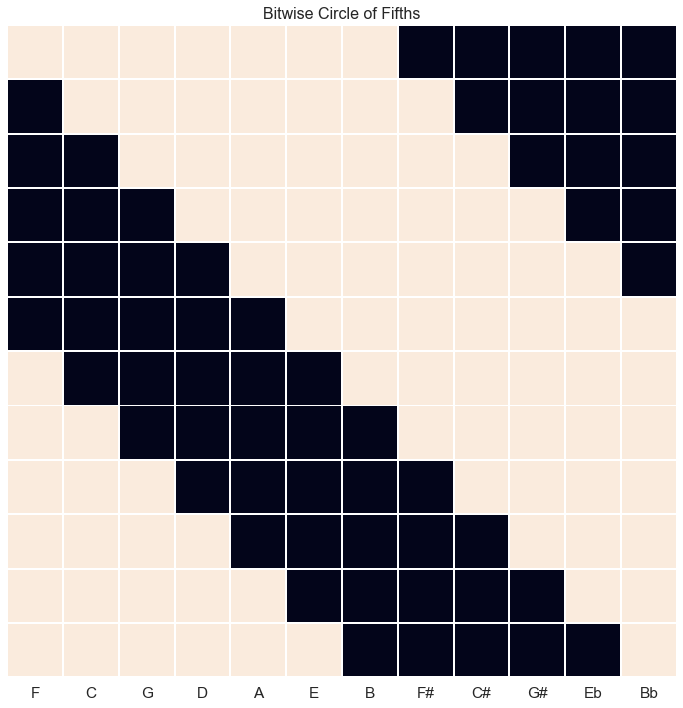

In [2]:
import numpy as np
import IPython.display as ipd

import jupyter_pt_tools as jpt_pt
import pt_utils
import pt_musicutils
import pt_keypattern
import pt_naming_conventions

circle_of_fifths = np.array([pt_utils.rotate_bits_right(0b111111100000, i) for i in range(12)])
jpt_pt.multiple_notegroup_heatmap(circle_of_fifths, title="Bitwise Circle of Fifths")

kpdve_modulation = [[i, 0, 1, 0, 0] for i in range(12)]
patterns = [mode + disp for mode, disp in [pt_musicutils.get_tonic_mode_disp_tuple(kpdve) for kpdve in kpdve_modulation]]
sequence = jpt_pt.link_ordered_wavestep_sequences(patterns, duration=10)
ipd.Audio(sequence, rate=4000)

# 2) analyzing tones in audio

Another interesting side effect is that a tone, acknowledged within a tonality, can better register its own disturbances -- primarily caused by its own feedback in the third harmonic. Here is a chromatic analysis of a single tone (C) played on a violin.  Its complex resonances fall largely within the C and the G above it. Interestingly, when the note fades out, the chormatic tones 

There are too many systems and too many patterns to count, but this is consistent building block. The number 3.

In [3]:
import librosa
import librosa.display

import matplotlib.pyplot as plt

filename = "../audio/violin_c.mp3"
y, sr = librosa.load(filename)
chroma_a = librosa.feature.chroma_cens(y=y, sr=sr)

/Users/timsummers/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


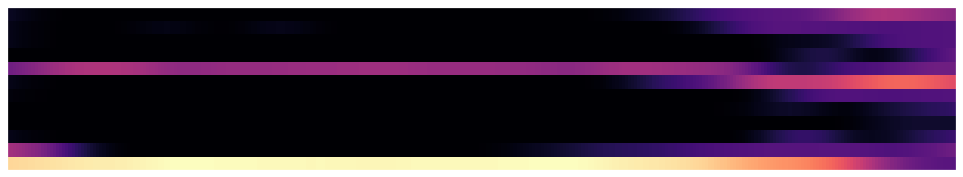

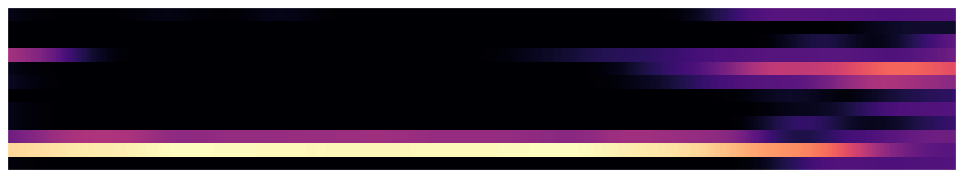

In [5]:
plt.figure(figsize=(17, 3))
librosa.display.specshow(chroma_a)
plt.figure(figsize=(17, 3))
librosa.display.specshow(jpt_pt.switch_chroma(chroma_a))
ipd.Audio(filename)

***

# Resolving Entropy and Designing harmonic patterns.

A last step: merely suggestive. Consider the resolution of a tritone, as the reduction from a 7-tone to a 5-tone space. 

This is not a theory: just a potential tool.

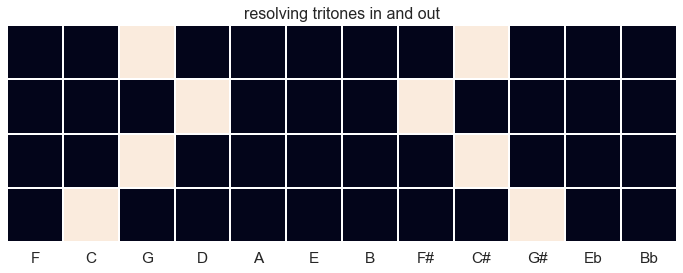

In [7]:
tritone = 0b1000001000
third = 0b0100010000
sixth = 0b010000000100

sequence = [tritone, third, tritone, sixth]

jpt_pt.multiple_notegroup_heatmap(sequence, title="resolving tritones in and out")

resolution = jpt_pt.link_wavepile_sequences(sequence)
ipd.Audio(resolution, rate=4000)

It looks like resolution. It sounds like a resolution. Maybe it is, somehow.

And some very simple patterns are just nice. There is a **lot** of room for fooling.

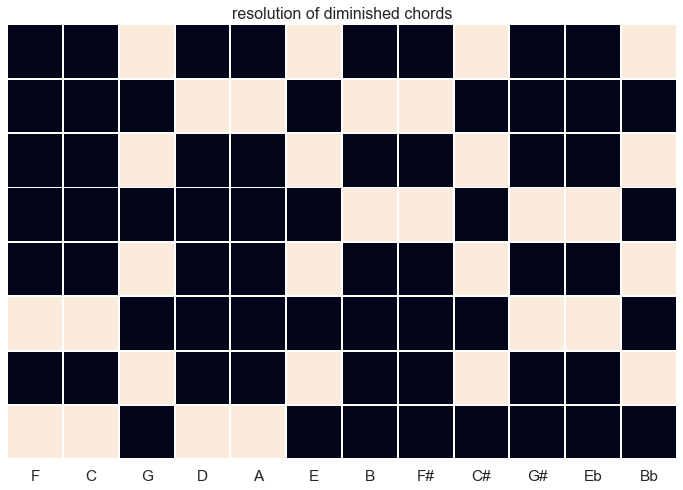

In [9]:
tritone = 0b1001001001
third = 0b0110110000
third2 = pt_utils.rotate_bits_right(third, 3)
third3 = pt_utils.rotate_bits_right(third, 6)
third4 = pt_utils.rotate_bits_right(third, 9)

sequence = [tritone, third, tritone, third2, tritone, third3, tritone, third4]

jpt_pt.multiple_notegroup_heatmap(sequence, title="resolution of diminished chords")

resolution = jpt_pt.link_wavepile_sequences(sequence, duration=4)
ipd.Audio(resolution, rate=4000)

Until you remember that each of these heatmaps represents a **only 12 bits of memory**. And can be used to analyze audio.

Then, it would seem, there is a **whole lot** of room for fooling.

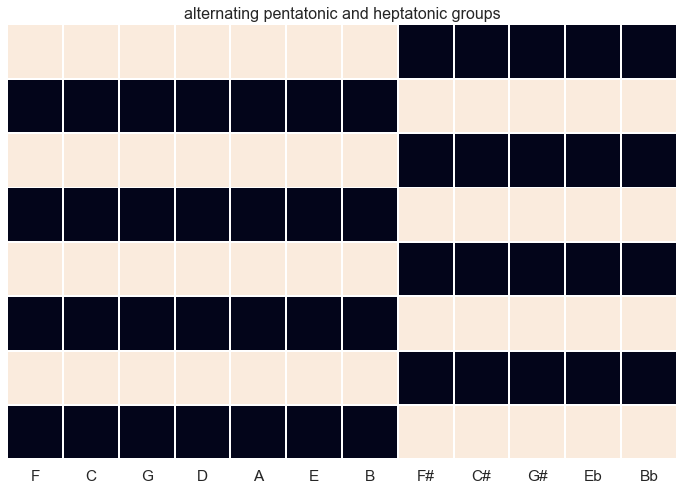

In [11]:
c = 0b111111100000
fs = 0b11111

sequence = [c, fs, c, fs,c, fs,c, fs]

jpt_pt.multiple_notegroup_heatmap(sequence, title="alternating pentatonic and heptatonic groups")

resolution = jpt_pt.link_wavepile_sequences(sequence)
ipd.Audio(resolution, rate=4000)

In [12]:
def min_to_graph(min_array, title=None):
    as_kpdve = [pt_utils.binary_encoding_to_KPDVE(a_chord) for a_chord in min_array]
    as_binary = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in as_kpdve]
    yticks = [pt_naming_conventions.chord_root_name_for_KPDVE(a_kpdve) for a_kpdve in as_kpdve]
    
    jpt_pt.horizontal_notegroup_heatmap(as_binary, xticks=yticks, title=title)

    return as_binary


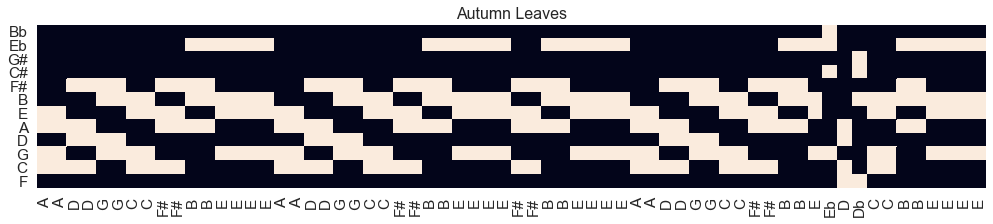

In [13]:
a_leaves = [4323, 4323, 4259, 4259, 4195, 4195, 4131, 4131, 6051, 6051, 5987, 
            5987, 5923, 5923, 5923, 5923] * 2 
a_leaves += [6051, 6051, 5987, 5987, 5923, 5923, 5923, 5923, 4323, 4323, 4259, 
             4259, 4195, 4195, 4131, 4131] 
a_leaves += [6051, 6051, 5987, 5987, 5923, 29411, 7331, 31843, 7203, 7203, 5987, 
             5987, 5923, 5923, 5923, 5923]

as_b = min_to_graph(a_leaves, "Autumn Leaves")

resolution = jpt_pt.link_wavepile_sequences(as_b, duration=40)
ipd.Audio(resolution, rate=4000)

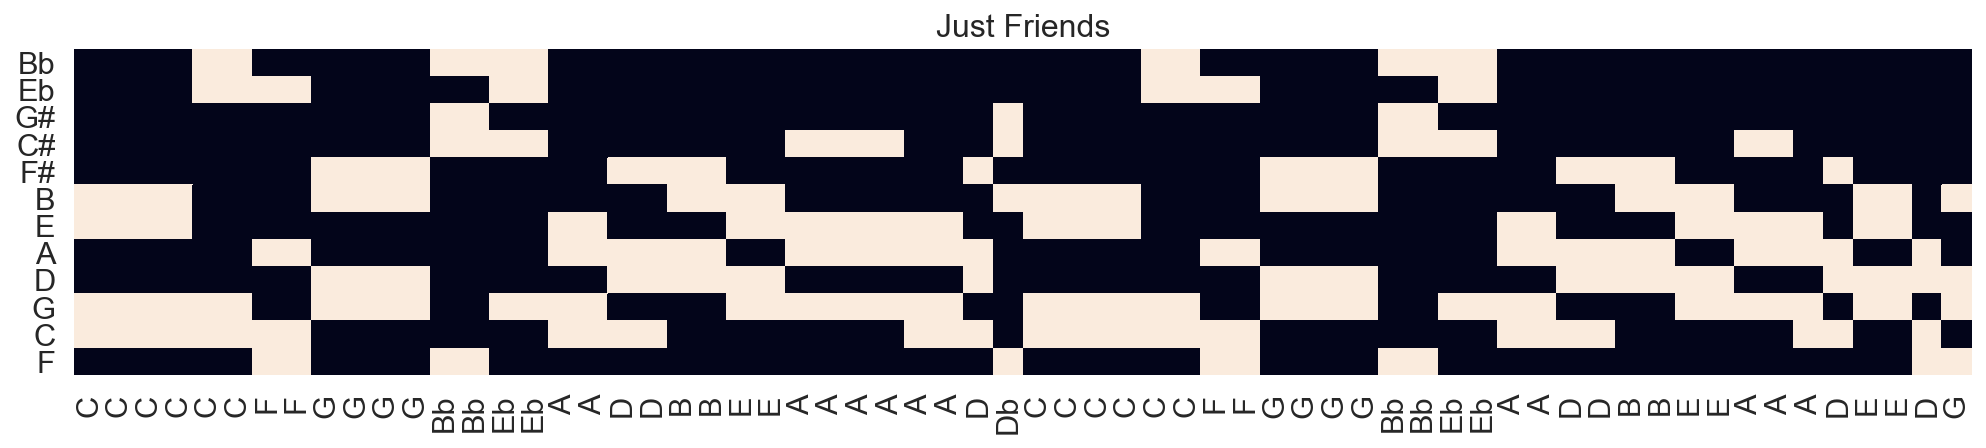

64


In [12]:
j_friends_1 = [7203, 7203, 7203, 7203, 48291, 48291, 48227, 48227, 4195, 4195, 4195, 4195, 40099, 40099, 40035, 40035, 4323, 4323, 4259, 4259, 4451, 4451, 4387, 4387, 4835, 4835]
j_friends_2 = [4835, 4835, 4323, 4323, 4259, 31843] 
j_friends_3 = j_friends_1
j_friends_4 = [4323, 4259, 4387, 4387, 7331, 7267]

j_friends = j_friends_1 + j_friends_2 + j_friends_3 + j_friends_4

as_b = min_to_graph(j_friends, "Just Friends")

print(len(j_friends))
resolution = jpt_pt.link_wavepile_sequences(as_b, duration=25)
ipd.Audio(resolution, rate=4000)

# Blue in Green

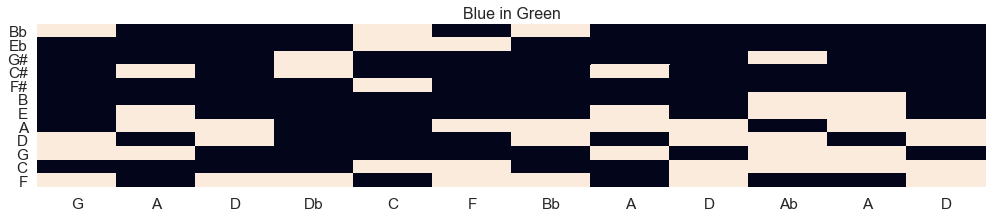

In [15]:
blue_in_green_chords =[46819, 46947, 48418, 40354, 43235, 43171, 45091, 46947, 45347, 2341, 45924, 45347]
as_b = min_to_graph(blue_in_green_chords, "Blue in Green")

resolution = jpt_pt.link_wavepile_sequences(as_b, duration=15)
ipd.Audio(resolution, rate=4000)

In [19]:
import numpy as np
import harmony_state

harmony = harmony_state.harmony_state(pt_utils.binary_encoding_to_KPDVE(45924))
print(harmony.string_description())

hex unique id (harmony hash): 0xb364895 
[11  1  5  4  4] 
0b100010010101
==-- derived meanings: --==
 (conventional) mode: C Major (dominant) 
(conventional) chord: A functioning as VI  
(non-entropic) base: Bb Lydian 

== chromatic (12-note pitch-class) locations: 
chord notes: [ 0  4  7  9 11] : A C E G B 
scale notes: [ 0  2  4  5  7  9 11] : A B C D E F G 

== modes and chords over roots (modal scales) 
   chord measured from root: [ 0  3  7 10 14] 
 root: 9 (A C E G B)
    mode measured from chord root: [ 0  2  3  5  7  8 10] 
 root : 9 (A B C D E F G)
displacement/mode *** for DAW settings: ***
    tonic scale: [ 0  2  4  5  7  9 11] 
 starting from: 0

== chord/scale degree (7-note) locations: [5 0 2 4 6]
None


In [20]:
harmony = harmony_state.harmony_state(np.array([11,  0,  4,  4,  3]))
print(harmony.string_description())

hex unique id (harmony hash): 0xb123a44 
[11  0  4  4  3] 
0b101001000100
==-- derived meanings: --==
 (conventional) mode: F Major (tonic) 
(conventional) chord: D functioning as VI  
(non-entropic) base: Bb Lydian 

== chromatic (12-note pitch-class) locations: 
chord notes: [0 2 5 9] : D F A C 
scale notes: [ 0  2  4  5  7  9 10] : D E F G A Bb C 

== modes and chords over roots (modal scales) 
   chord measured from root: [ 0  3  7 10] 
 root: 2 (D F A C)
    mode measured from chord root: [ 0  2  3  5  7  8 10] 
 root : 2 (D E F G A Bb C)
displacement/mode *** for DAW settings: ***
    tonic scale: [ 0  2  4  5  7  9 11] 
 starting from: 5

== chord/scale degree (7-note) locations: [5 0 2 4]
None
